In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3112,ham,"Wat time liao, where still got.",NaN,NaN,NaN
1847,spam,FREE NOKIA Or Motorola with upto 12mths 1/2pri...,NaN,NaN,NaN
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
766,ham,"I'm nt goin, got somethin on, unless they meet...",NaN,NaN,NaN
3202,ham,Haha... Yup hopefully we will lose a few kg b...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df = df[['v1','v2']]

In [12]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [13]:
df.head(1)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df.target = encoder.fit_transform(df.target)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df.drop_duplicates(keep='first', inplace=True)

In [20]:
df.duplicated().sum()

0

# 2. EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

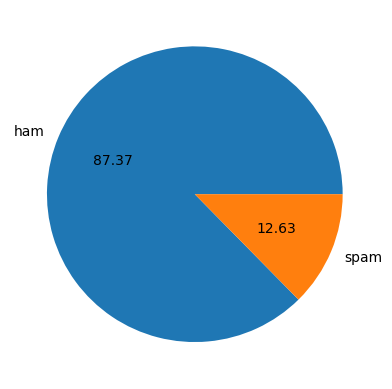

In [25]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
#Data is imbalanced

In [26]:
import nltk

In [28]:
df['num_characters'] = df.text.apply(len)

In [30]:
df.head(1)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [34]:
df['num_words'] = df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df['num_sentences'] = df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#ham
df[df.target==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#spam
df[df.target==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

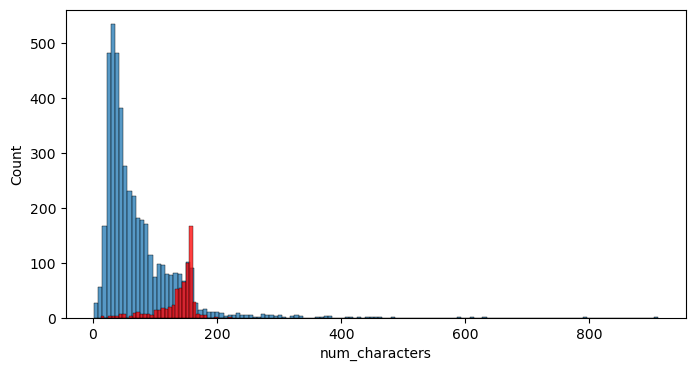

In [53]:
plt.figure(figsize=(8,4))
sns.histplot(df[df.target==0]['num_characters'])
sns.histplot(df[df.target==1]['num_characters'], color='red')

<Figure size 800x400 with 0 Axes>

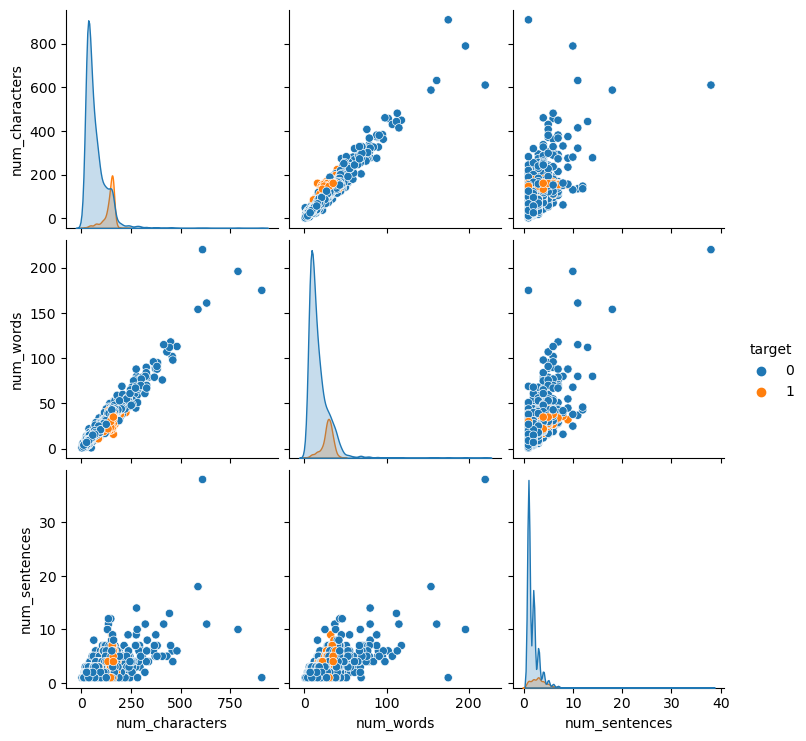

In [54]:
plt.figure(figsize=(8,4))
sns.pairplot(df, hue='target')

C:\Users\sagar\AppData\Local\Temp\ipykernel_19360\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

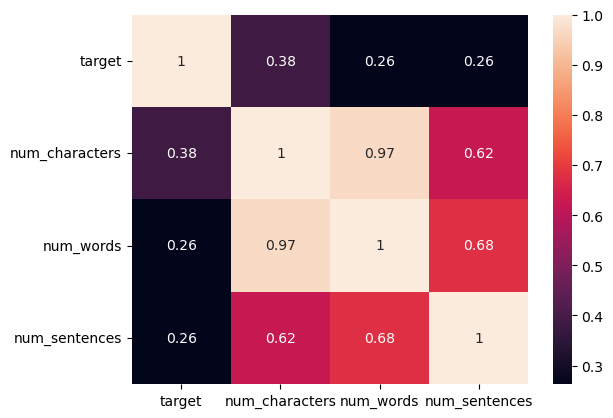

In [57]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [123]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    L=[]
    for i in text:
        if(i.isalnum()):
            L.append(i)
    text=L[:]
    L.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            L.append(i)
    text=L[:]
    L.clear()
    for i in text:
        L.append(ps.stem(i))
    return " ".join(L)

In [125]:
transform_text(df.text[10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [113]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [127]:
df.text = df.text.apply(transform_text)

In [128]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [149]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [150]:
spam_wc= wc.generate(df[df.target==1].text.str.cat(sep=" "))

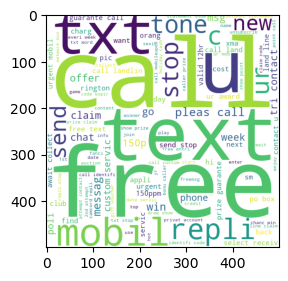

In [155]:
plt.figure(figsize=(3,6))
plt.imshow(spam_wc)

In [156]:
ham_wc= wc.generate(df[df.target==0].text.str.cat(sep=" "))

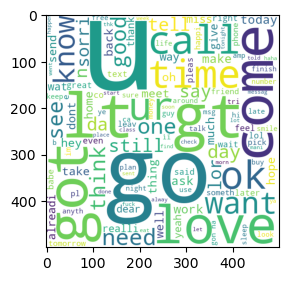

In [157]:
plt.figure(figsize=(3,6))
plt.imshow(ham_wc)

In [158]:
spam_corpus=[]
for msg in df[df.target==1].text.tolist():
    for word in msg.split():
        spam_corpus.append(word)

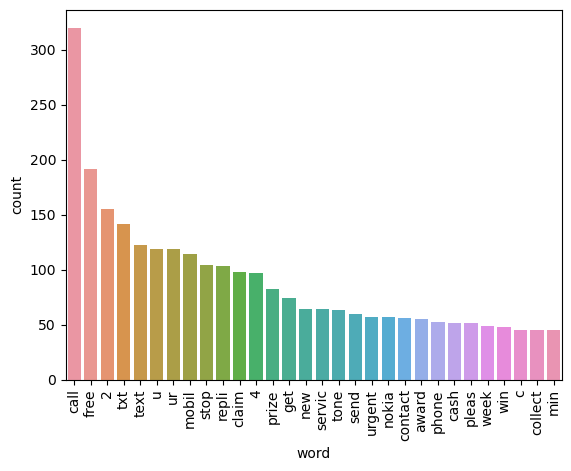

In [173]:
from collections import Counter
count_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=count_data)
plt.xticks(rotation='vertical')
plt.show()
    

In [174]:
ham_corpus=[]
for msg in df[df.target==0].text.tolist():
    for word in msg.split():
        ham_corpus.append(word)

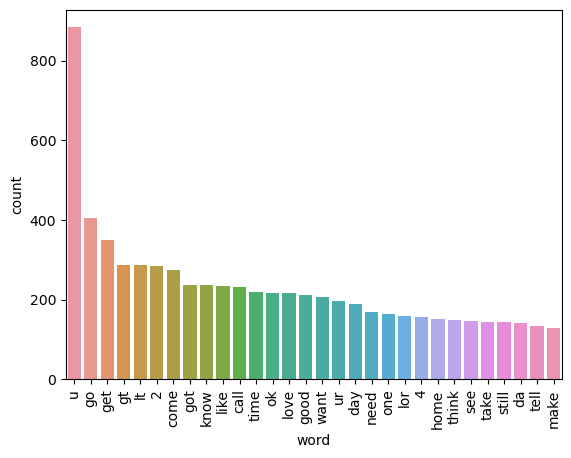

In [175]:
from collections import Counter
count_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=count_data)
plt.xticks(rotation='vertical')
plt.show()

In [176]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [243]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [244]:
X = tfidf.fit_transform(df.text).toarray()

In [182]:
y = df.target.values

In [183]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [184]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 4. Model Building

In [188]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [187]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [201]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [202]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [203]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# chosen model = tfidf -> mnb

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [208]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [237]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [246]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [247]:
from tqdm import tqdm
accuracy_scores=[]
precision_scores=[]
for name,clf in tqdm(clfs.items()):
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:49<00:00,  5.54s/it]


In [241]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [248]:
performance_df["accuracy_3000"]=accuracy_scores
performance_df["precision"]=precision_scores

In [263]:
performance_df.sort_values(by='precision_3000', ascending=False)

,Algorithms,Accuracy,Precision,accuracy_3000,precision_3000
1,NB,0.959381,1.000000,0.970986,1.000000
4,RF,0.971954,1.000000,0.975822,0.982906
0,SVC,0.972921,0.974138,0.975822,0.974790
6,ETC,0.972921,0.982456,0.974855,0.974576
3,LR,0.951644,0.940000,0.958414,0.970297
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
8,xgb,0.972921,0.943548,0.967118,0.926230
7,GBDT,0.952611,0.923810,0.946809,0.919192
2,DT,0.935203,0.838095,0.929400,0.828283


In [ ]:
#minmax scaling, voting classifier, stacking

In [265]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))